In [57]:
import pandas as pd
from sklearn import metrics
import scipy
from scipy.sparse import csr_matrix
from scipy.sparse import csgraph
from scipy.sparse.csgraph import connected_components
from scipy.sparse.linalg import eigsh
import os
import matplotlib.colors as mcolors 
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
import cooler
import random

tool_path = "/home/cstansbu/miniconda3/lib/python3.9/site-packages/"
sys.path.append(tool_path)
import graph_tool.all as gt
print(f"{gt.__version__=}")

source_path = os.path.abspath("../source/")
sys.path.append(source_path)
import utils as ut
import plotting as plt2
import hypercore as hc
import matrix as matrix
import reconstruction as recon

gt.__version__='2.58 (commit c513b9b6, )'


A.shape=(196, 196)
A.shape=(193, 193)


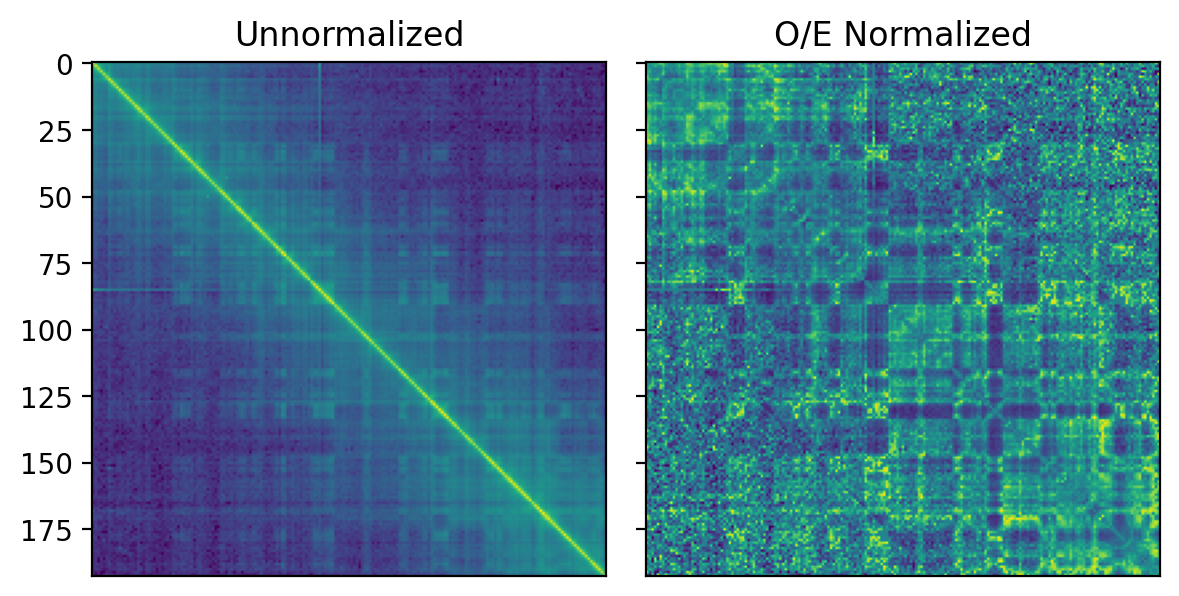

In [2]:
reload(matrix)
fpath = "/scratch/indikar_root/indikar1/shared_data/higher_order/population_hic/chr1_1000000.csv"

df  = pd.read_csv(fpath)
A = df.to_numpy()
print(f"{A.shape=}")

# drop the telomere
A = A[3:, :][:, 3:]
print(f"{A.shape=}")

Anorm = matrix.normalize_oe(matrix.normalize_kr(A).todense())


# correct outliers
top = 500
row_idx, col_idx = matrix.get_sorted_upper_triangle_indices(Anorm)

# update the matrix 
for i in range(top):
    Anorm[row_idx[i], col_idx[i]] = Anorm.mean()


# visualize
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 3
fig, axs = plt.subplots(1, 2, sharey=True)

axs[0].imshow(np.log1p(A))
axs[1].imshow(Anorm)

axs[0].set_title('Unnormalized')
axs[1].set_title('O/E Normalized')

axs[0].set_xticks([])
axs[1].set_xticks([])

plt.tight_layout()

Input network thresholded at threshold=1.2 has 1 connected component(s)


([], [])

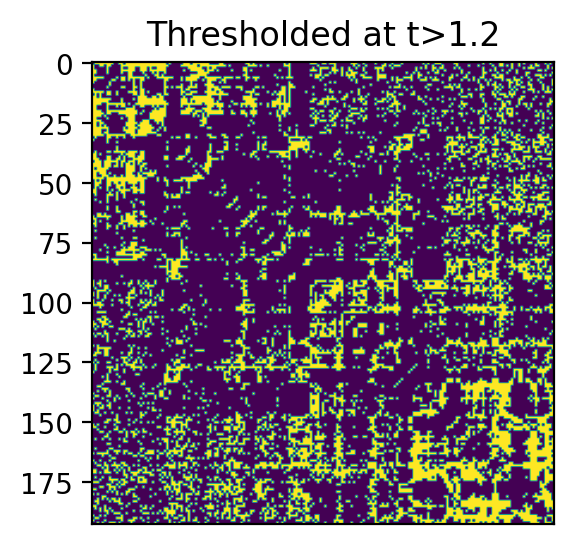

In [3]:
threshold = 1.2
Ahat = np.where(Anorm > threshold, 1, 0)
num_components, _ = connected_components(Ahat, directed=False)
print(f"Input network thresholded at {threshold=} has {num_components} connected component(s)")

g = recon.create_graph_tools_from_adjacency(Ahat)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 3
plt.imshow(Ahat)
plt.title(f"Thresholded at t>{threshold}")
plt.xticks([])

In [23]:
hyperedges = recon.learn_hyperedges_mcmc(g, niter=200)
print(f"{len(hyperedges)=}")

len(hyperedges)=899


gt.__version__='2.58 (commit c513b9b6, )'


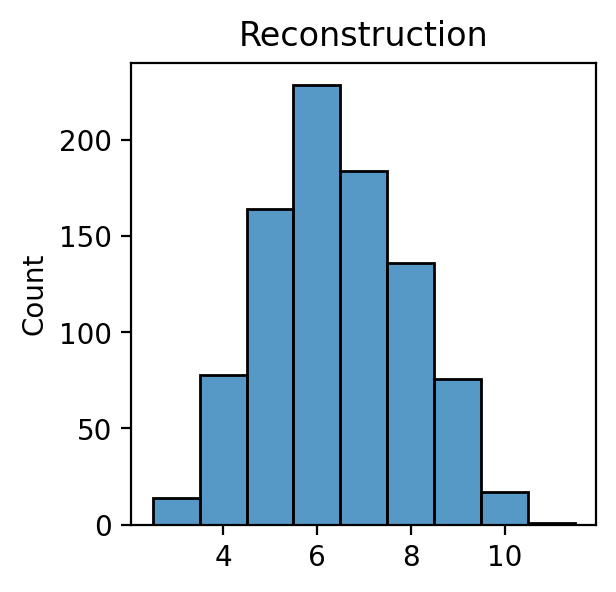

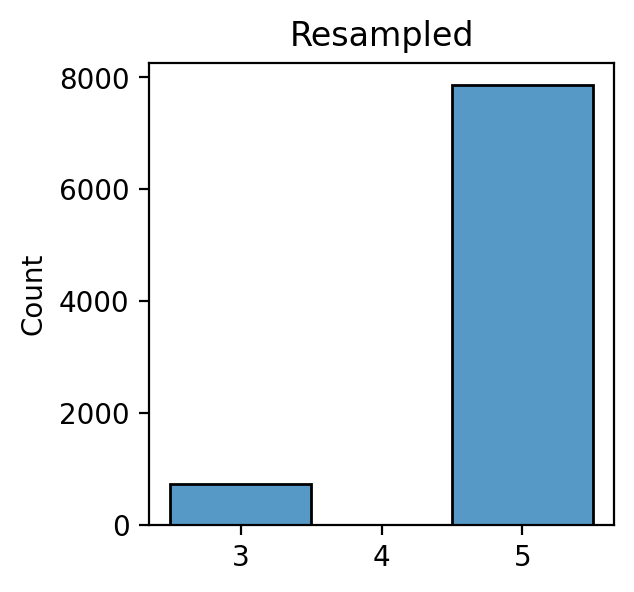

In [117]:
reload(recon)

orders = [len(x) for x in hyperedges]

distribution = {
    3 : 0.5,
    5 : 0.5,
}

def sample_indices(data, distribution):
    """A function to sample from one distribution to force another distribution """
    
    

    


# new_h = list(np.asarray(hyperedges, dtype=object)[ind])
# new_orders = [len(x) for x in new_h]


# sns.histplot(orders, discrete=True)
# plt.title('Reconstruction')
# plt.show()

# sns.histplot(new_orders, discrete=True)
# plt.title('Resampled')
# plt.show()


# Learn Higher-Order Structure

In [11]:
niter = 2

state = gt.CliqueState(g)
# state.mcmc_sweep(niter=niter)

hyperedges = []
for v in state.f.vertices():  
    if state.is_fac[v]:
        continue

    if state.x[v] > 0:
        hyperedge = list(state.c[v])
        
        print(state.x)
        
        break
        # hyperedges.append(hyperedge)


<VertexPropertyMap object with value type 'int32_t', for Graph 0x154b9feb9e10, at 0x154b9f84ee60>


In [21]:
len(state.c[v])

4

In [14]:
dir(state.x)

['_PropertyMap__base_g',
 '_PropertyMap__convert',
 '_PropertyMap__g',
 '_PropertyMap__get_set_f_array',
 '_PropertyMap__get_set_m_array',
 '_PropertyMap__key_type',
 '_PropertyMap__map',
 '_PropertyMap__register_map',
 '_PropertyMap__set_array',
 '_PropertyMap__unregister_map',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_any',
 '_get_data',
 'a',
 'coerce_type',
 'copy',
 'data_ptr',
 'fa',
 'get_2d_array',
 'get_array',
 'get_graph',
 'is_writable',
 'key_type',
 'ma',
 'python_value_type',
 'reserve',
 'resize',
 'set_2d_array',
 'set_va

In [10]:
?gt.CliqueState

Init signature: gt.CliqueState(g, init_edges=False, init_max_cliques=True, init_list=None)
Docstring:     
The state of a clique decomposition of a given graph.

Parameters
----------
g : :class:`~graph_tool.Graph`
    Graph to be modelled.
init_edges : ``bool`` (optional, default: ``False``)
    If ``True``, the state will be initialized with edges being
    occupied.
init_max_cliques : ``bool`` (optional, default: ``True``)
    If ``True``, the state will be initialized with the maximal cliques.
init_list : ``dict`` (optional, default: ``{}``)
    If given, this will give the initialization state. Keys are the clique
    nodes and values are the counts.

Examples
--------
.. testsetup:: clique_decomposition

   gt.seed_rng(42)
   np.random.seed(42)

.. doctest:: clique_decomposition

   >>> g = gt.collection.data["polbooks"]
   >>> state = gt.CliqueState(g)
   >>> state.mcmc_sweep(niter=10000)
   (...)
   >>> cliques = []
   >>> for v in state.f.vertices():      # iterate through fac

In [4]:
hyperedges = recon.learn_hyperedges_mcmc(g, niter=200)
print(f"{len(hyperedges)=}")

len(hyperedges)=917


In [5]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)